# Numerical solution of second order equations of motion

[**Download this notebook**](https://ifa-edu-it.github.io/learning-material/courses/mechanics-thermodynamics/mechanics-numpy-space-shuttle.ipynp)


In many problems in introductory classical mechanics the forces applied to an object are known, and from there the acceleration can be calculated from Newton's second law. If the acceleration $a$ is a function of the time $t$, position $x$ and velocity $v$, the position and velocity $x(t), \, v(t)$ of the object can be calculated by solving the differential equation
$$\frac{d^2x}{dt^2} = a \left(t, x, \frac{dx}{dt}\right), \,\,\,\, x(t_0) = x_0, \,\,\,\, v(t_0) = v_0 \,. $$

In simple cases differential equations can be solved analytically, but in many cases it is very useful to be able to solve differential equations numerically.

## Euler-Cromer's method


Euler-Cromer's method is an algorithm to solve partial second order differential equations as the one above numerically. In the method the equation is discretized and solved for a number of timesteps with a constant interval $\Delta t$. At every timestep $t_i + \Delta t$ the velocity is calculated from the velocity and the acceleration at the previous timestep as
$$v(t_i + \Delta t) \approx v(t_i) \, a \left(t_i,\, x(t_i),\, v(t_i)\right) \Delta t \,.$$
The approximation is based on the assumption that the acceleration is constant over the timeinterval $\Delta t$.

When the velocity at the time $t_i + \Delta t$ is calculated, the position can be approximated from the velocity as well as the position at the previous timestep as
$$x(t_i + \Delta t) \approx x(t_i) + v(t_i + \Delta t)\; \Delta t.$$
This step is based on the assumption that the velocity $v(t_i + \Delta t)$ is constant over the time interval. 

Hence, the equation of motion can be solved numerically for a number of timesteps by an iterative process, where the acceleration, velocity and position are updated at every timestep $t_i + \Delta t$ based on their respective values at the previous timestep. 

## Space shuttle with air resistance

A mechanical problem, which can be solved using the above method, is a space shuttle moving in one dimension with air resistance (problem 5.25 from "Elementary mechanics using Python", Anders Malthe-Sørensen).
It is assumed that the engines of the space shuttle during lift-off deliver a constant force of 35 million Newton, and that the space shuttle the first 20 secons of lift-off has an approximately constant mass of 2 million kg. 
It is assumed that the air resistance on the space shuttle can be described by an quadratic relation as $F = - D v |v|$, where $D \approx 388 kg/m$ is a constant, and $v$ is the velocity. 

In reality $D$ is not a constant but depends on the density of the surrounding air. As the density decreases as a function of height, $D$ therefor depends on the height of the space shuttle.
It is possible to implement a function for $D(y)$ in the for-loop with Euler-Cromer's method.
Below an arbitrary guess at a function for $F_{air}(y, v) = - D \cdot 20^{-10^{-5} y} \, v |v| \,$ is implemented in the for-loop as an example.

Furthermore, the mass of the space shuttle probably decreases gradually, as the engines burn of the fuel, just like the force from the engines might vary during lift-off. It is straight forward to implement different variables and functions in the for-loop and thereby make the problem more complex and the solutions more realistic.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and physical quantities
m = 2e6 #kg
F_engine = 35e6 #N
g = -9.82 #N
D = 388 #kg/m


time = 120 #s
dt = 0.0005
n = int(time / dt)

# Acceleration, velocity and position without air resistance
t_ = np.linspace(0, 120, n)
a_ = (F_engine) / m + g
v_ = a_ * t_
y_ = 1/2 * a_ * t_**2


##########  With air resistance  ############
v = np.zeros(n)
a = np.zeros(n)
y = np.zeros(n)
t = np.zeros(n)

# Initial conditions for velocity and position
v[0], y[0] = 0, 0

# For-loop which implements the Euler-Cromer's method and calculates the acceleration, velocity and position 
# for each of the n timesteps

for i in range(n-1):
        
    a[i] = g + (F_engine - D * v[i] * abs(v[i])) / m
    v[i+1] = v[i] + a[i] * dt
    y[i+1] = y[i] + v[i+1] * dt
    t[i+1] = t[i] + dt
    
    # Calculates the acceleration at the last timestep
    if i == n-2:
        a[i+1] = g + (F_engine - D * v[i+1] * abs(v[i+1])) / m
    else:
        continue


        
##### With air resistance, which depends on the height by the arbitrary function D(y) = D * 20**(-10**5 * y) #####
v1 = np.zeros(n)
a1 = np.zeros(n)
y1 = np.zeros(n)
t1 = np.zeros(n)

v1[0], y1[0] = 0, 0

for i in range(n-1):
    
    a1[i] = g + (F_engine - D * 20**(-1e-5 * y1[i]) * v1[i] * abs(v1[i])) / m
    v1[i+1] = v1[i] + a1[i] * dt
    y1[i+1] = y1[i] + v1[i+1] * dt
    t1[i+1] = t1[i] + dt
    
    if i == n-2:
        a1[i+1] = g + (F_engine - D * 20**(-1e-5 * y1[i+1])* v1[i+1] * abs(v1[i+1])) / m
    else:
        continue

    

## Plot of the position, velocity and acceleration with and without air resistance

Below the motion of the space shuttle is plotted as a function of time for 20 s and 120 s, respectively. 
The plots show that within the first 20 s of take-off, the velocity and height with and without air resistance, respecetively, only deviate slightly. But after approximately 60 s the air resistance (for a constant value of $D$) get's so large that the acceleration of the space shuttle becomes 0, and the space shuttle reaches its terminal velocity of $v_{term} \approx 199$ m/s. Without air resistance the acceleration is constant, and the velocity increases linearly with time. 

No handles with labels found to put in legend.


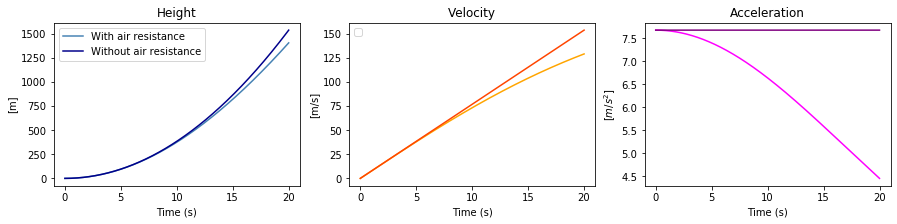

C:\Users\Maja Ehlig Petersen\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


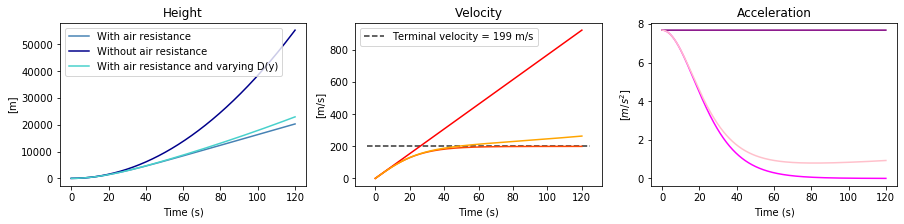

In [3]:
fig, ax = plt.subplots(1, 3, figsize = (15, 3))

t2 = int(20 / dt)

ax[0].plot(t[:t2], y[:t2], color = "steelblue", label = "With air resistance")
ax[1].plot(t[:t2], v[:t2], color = "orange")
ax[2].plot(t[:t2], a[:t2], color = "magenta")

ax[0].plot(t_[:t2], y_[:t2], color = "darkblue", label = "Without air resistance")
ax[1].plot(t_[:t2], v_[:t2], color = "orangered")
ax[2].plot(t_[:t2], [a_]*t2, color = "purple")

ax[0].set_title("Height")
ax[1].set_title("Velocity")
ax[2].set_title("Acceleration")

ax[0].set_xlabel("Time (s)")
ax[1].set_xlabel("Time (s)")
ax[2].set_xlabel("Time (s)")

ax[0].set_ylabel("[m]")
ax[1].set_ylabel("[m/s]")
ax[2].set_ylabel(r"[$m/s^2$]")

ax[0].legend()
ax[1].legend()

fig, ax = plt.subplots(1, 3, figsize = (15, 3))

ax[0].plot(t, y, color = "steelblue", label = "With air resistance")
ax[0].plot(t_, y_, color = "darkblue", label = "Without air resistance")
ax[0].plot(t1, y1, color = "mediumturquoise", label = "With air resistance and varying D(y)")

ax[1].plot(t, v, color = "orangered")
ax[1].plot(t_, v_, color = "red")
ax[1].plot(t1, v1, color = "orange")
ax[1].hlines(v[-1], t[0]-5, t[-1] + 5, linestyle = "--", alpha = 0.8, label = f"Terminal velocity = {round(v[-1])} m/s")

ax[2].plot(t, a, color = "magenta")
ax[2].plot(t_, [a_] * n, color = "purple")
ax[2].plot(t1, a1, color = "pink")

ax[0].set_title("Height")
ax[1].set_title("Velocity")
ax[2].set_title("Acceleration")

ax[0].set_xlabel("Time (s)")
ax[1].set_xlabel("Time (s)")
ax[2].set_xlabel("Time (s)")

ax[0].set_ylabel("[m]")
ax[1].set_ylabel("[m/s]")
ax[2].set_ylabel(r"[$m/s^2$]")

ax[0].legend()
ax[1].legend()



When $D$ is independent of height an constant, the air resistance increases, until the space shuttle reaches its terminal velocity, whereafter the air resistance is constant.

When $D$ decreases with height through $D(y) = 20^{-10^{-5} y}$, the air resistance starts of with the same increase as for $D(y) = D$. But at some point the decrease of $D(y)$ starts dominating over the increasing velocity-component, and the air resistance reaches a maximum and slowly decreases. For this reason the acceleration don't go towards zero, and the velocity keeps slightly increasing. This is shown with the light coloured graphs in the above plots.

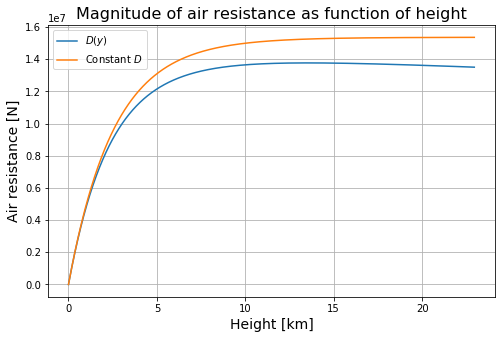

In [11]:
plt.figure(figsize = (8, 5))
air_res = D * 20**(-1e-5 * y1) * v1 * abs(v1)
air_res2 = D * v * abs(v)
plt.plot(y1/1000, air_res, label = "$D(y)$")
plt.plot(y1/1000, air_res2, label = "Constant $D$")
plt.grid()
plt.title("Magnitude of air resistance as function of height", fontsize = 16)
plt.xlabel("Height [km]", fontsize = 14)
plt.ylabel("Air resistance [N]", fontsize = 14)

plt.legend()